In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pandas import isnull

# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# print(module_path)
# sys.path.append(module_path)
import model.parts.utils as utils
from model.sys_params import *
df = pd.read_pickle(r'experiment.p')

stakeDelegatedLockeds: 474 events
stakeDelegatedWithdrawns: 331 events
allocationCloseds: 84 events
allocationCollecteds: 18 events
stakeDepositeds: 36 events
rewardsAssigneds: 84 events
delegationParametersUpdateds: 9 events
allocationCreateds: 93 events
TOTAL NUMBER OF EVENTS: 1867
You should set SIMULATION_TIME_STEPS in config.py to a minimum of 1867 to capture all events.



In [2]:
df

,indexers,simulation,subset,run,substep,timestep,cumulative_indexing_revenue,cumulative_query_revenue
12,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,0,0,1,12,1,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
24,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,0,0,1,12,2,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
36,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,0,0,1,12,3,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
48,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,0,0,1,12,4,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
60,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,0,0,1,12,5,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
...,...,...,...,...,...,...,...,...
22356,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,0,0,1,12,1863,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
22368,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,0,0,1,12,1864,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
22380,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,0,0,1,12,1865,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
22392,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,0,0,1,12,1866,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...


In [3]:
indexers = df['indexers']
indexer_values = {}
timestep = 0
for i in indexers:
    for indexer_id, values in i.items():
        if indexer_id not in indexer_values:
            indexer_values[indexer_id] = {}
        indexer_values[indexer_id][timestep] = values.delegators
    timestep += 1
indexer_values_df = pd.DataFrame(indexer_values)
for i in indexer_values_df.columns:
    indexer_values_df[i] = [{} if j != j else j for j in indexer_values_df[i]]
indexer_values_df

,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,0xfb5b40098cdfec1564ae5b94d4deed116b887d08,0xd133fd8e0607f5d82c91626140495ea0a31d0398
0,{},{},{}
1,{},{},{}
2,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{}
3,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{}
4,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{}
...,...,...,...
1862,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...,{'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...
1863,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...,{'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...
1864,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...,{'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...
1865,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...,{'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...


In [4]:
indexer_df_1 = indexer_values_df['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e']
delegator_shares = []
delegator_dict = {}
timestep = 0

for i in indexer_values_df.columns:
    for j in indexer_values_df[i]:
        for delegator_id, delegator in j.items():
            if delegator_id not in delegator_dict:
                delegator_dict[delegator_id] = {}
            delegator_dict[delegator_id][timestep] = float(delegator.shares)
        timestep += 1
    timestep = 0
    delegator_shares.append(delegator_dict)
    delegator_dict = {}

In [5]:
pd.DataFrame(delegator_shares[2])

,0x476c4c3f95e87d4b16454bfc2bdf96417afaa649,0x8eb8f9db64a7e4e066d1d2fa09c6b05066933f4a,0x47195d4d9544351a402295224f66a139aff34cfe,0x392bee54b66bd3d476575435ed36231444fff749,0x64bd4397302c775c087f422d11491c97ecd4d524,0xfc7759c0b4d5bf1fee3a7da7214570a809028d45,0x4172c8054d1af5a8ac12b87729d9f2bc3951f39f,0x59a8bd8cedc03a9859b365608250568c20958548,0xbdc6e3b66019f0db3d833091a46b4e616fe3e390,0x56e07f2a074b6e780947c85a7670a4fd43a0aa76,...,0x38877923cc7ddf46e0eb4753b365d16ff5d7dbdf,0x0a2371c85b103c36911cb0ee590f116414a8129a,0x8a31e5dc327f2e256871546ff4b5a24b536b71e7,0xe2220444f332baf7413fdb2e8c5f327d6269a6e7,0x1cdcfbde69fcbb0cfe6e1e5c600e7b92109ce036,0x8c355f0fecdd41e5b3df2f6a7687de765713426e,0x1d078b29b012623ba7ea7dcc80cd44f13d8b6e10,0x5fdd19387a6b10a8f627a4111aea4b1c769914fa,0xf40030616012afe4451e44701c59f4e49540ebfd,0xcbb35782e564cd6b8273433a81718dfefd6dd11d
1297,11608.267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1298,116082.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,116082.670,116082.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1300,116082.670,116082.67,116082.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1301,116082.670,116082.67,116082.67,116082.67,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862,107749.670,107749.67,107749.67,107749.67,107749.67,107749.3575,107749.3575,107749.3575,107749.3575,107749.3575,...,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,1580843.065
1863,107749.670,107749.67,107749.67,107749.67,107749.67,107749.3575,107749.3575,107749.3575,107749.3575,107749.3575,...,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,1580843.065
1864,107749.670,107749.67,107749.67,107749.67,107749.67,107749.3575,107749.3575,107749.3575,107749.3575,107749.3575,...,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,1580843.065
1865,107749.670,107749.67,107749.67,107749.67,107749.67,107749.3575,107749.3575,107749.3575,107749.3575,107749.3575,...,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,107750.65505,1580843.065


# Delegator Shares By Indexer

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1, subplot_titles = [f'Delegator Shares for Indexer {i}'  for i in indexer_values_df.columns])

for i in range(len(delegator_shares)):
    delegator_df = pd.DataFrame(delegator_shares[i])
    #delegator_df = delegator_df.reset_index()
    for j in delegator_df.columns:
        fig.append_trace(
            go.Scatter(x = delegator_df.index, y = delegator_df[j], fill='tozeroy',  stackgroup = 'one', name = j),
            row=i + 1, col=1
        )
fig.show()

# Withdraw Frequency

In [7]:
withdraw_events_dict = withdraw_events

In [8]:
withdraw_events_df = pd.DataFrame(withdraw_events_dict).T

In [9]:
withdraw_events_df = pd.DataFrame(list(withdraw_events_df[0]))

In [10]:
withdraw_events_df.head()

,timestep,allocationID,blockNumber,epoch,id,indexer,logIndex,subgraphDeploymentID,tokens,type,...,from,rebateFees,delegator,shares,eventTime,until,indexingRewardCut,queryFeeCut,delegationFees,amount
0,663,NaN,11659457,NaN,0xeb61d501f54d4bad4ea105d09de363ab8c6ff06830d7...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,131,NaN,12488.567623993900000000,stakeDelegatedWithdrawns,...,NaN,NaN,0xf5376e847efa1ea889bfcb03706f414dade0e82c,0,NaN,NaN,NaN,NaN,NaN,0
1,664,NaN,11659462,NaN,0x536594f889395a7ea8ea8d7d173ef48f5e78acf31a4f...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,135,NaN,14169.714085664846000000,stakeDelegatedWithdrawns,...,NaN,NaN,0x1853bf6a892abd949aed052bb634ab96afaf31dd,0,NaN,NaN,NaN,NaN,NaN,0
2,665,NaN,11660534,NaN,0x832595066ea463a1ecc46d05f6d6e32e75ef0e950e88...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,48,NaN,251819.644650000000000000,stakeDelegatedWithdrawns,...,NaN,NaN,0xd776a7306ee6a060cebb46b46d305e88fd39ba84,0,NaN,NaN,NaN,NaN,NaN,0
3,666,NaN,11661884,NaN,0x491c394eb8522ade3ed63cf112fa75040bad5801d642...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,75,NaN,6505.310000000000000000,stakeDelegatedWithdrawns,...,NaN,NaN,0x81b4687d4193916aa6cf65360bf96b1e4279278a,0,NaN,NaN,NaN,NaN,NaN,0
4,669,NaN,11663435,NaN,0xd84038f1f19167aba105c54ef1e22af798e9642fce1f...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,168,NaN,65257.075000000000000000,stakeDelegatedWithdrawns,...,NaN,NaN,0x57b4a5f470c85d4281f7baf5162b59243a3491df,0,NaN,NaN,NaN,NaN,NaN,0


In [11]:
withdraw_hist_df = indexer_values_df.merge(withdraw_events_df, how = 'outer', left_on = indexer_values_df.index, right_on = 'timestep')

In [12]:
withdraw_hist_df.head()

,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,0xfb5b40098cdfec1564ae5b94d4deed116b887d08,0xd133fd8e0607f5d82c91626140495ea0a31d0398,timestep,allocationID,blockNumber,epoch,id,indexer,logIndex,...,from,rebateFees,delegator,shares,eventTime,until,indexingRewardCut,queryFeeCut,delegationFees,amount
0,{},{},{},0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{},{},{},1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
for i in indexer_values_df.columns:
    withdraw_hist_df[f'{i}_withdraw'] = [1 if j == i else 0 for j in withdraw_hist_df['indexer']]
withdraw_hist_df.head()

,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,0xfb5b40098cdfec1564ae5b94d4deed116b887d08,0xd133fd8e0607f5d82c91626140495ea0a31d0398,timestep,allocationID,blockNumber,epoch,id,indexer,logIndex,...,shares,eventTime,until,indexingRewardCut,queryFeeCut,delegationFees,amount,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e_withdraw,0xfb5b40098cdfec1564ae5b94d4deed116b887d08_withdraw,0xd133fd8e0607f5d82c91626140495ea0a31d0398_withdraw
0,{},{},{},0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,{},{},{},1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


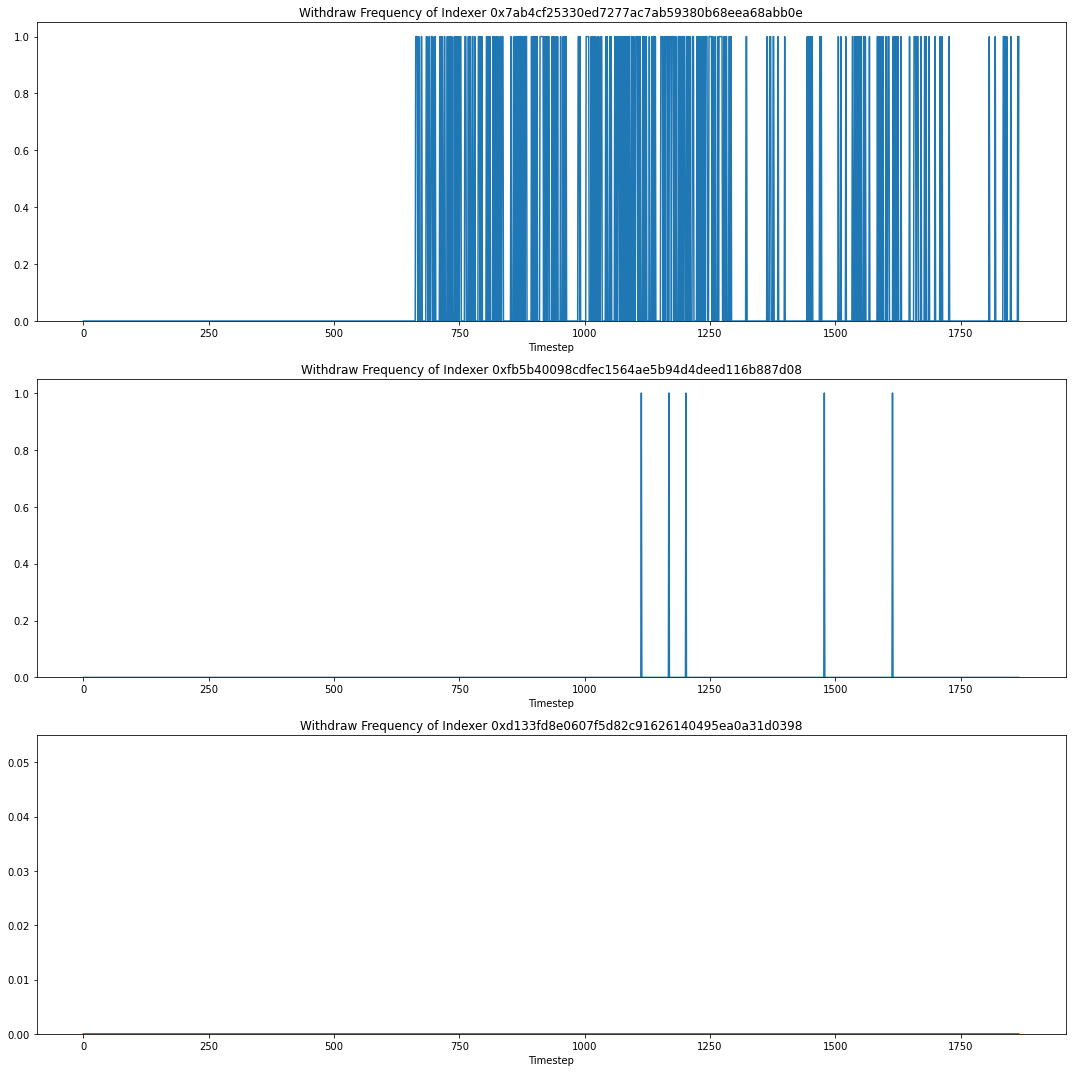

In [14]:
fig, axs = plt.subplots(len(delegator_shares), figsize = (15,15))
for i, j in enumerate(indexer_values_df.columns):
    axs[i].plot(withdraw_hist_df.timestep, withdraw_hist_df.loc[:, f'{j}_withdraw'])
    axs[i].set_title(f'Withdraw Frequency of Indexer {j}')
    axs[i].set_xlabel('Timestep')
    axs[i].set_ylim(0)
fig.tight_layout()

In [15]:
for i in indexer_values_df.columns:
    withdraw_hist_df[f'{i}_withdraw_weighted'] = [j['tokens'] if j['indexer'] == i  else 0 for k, j in withdraw_hist_df.iterrows()]
withdraw_hist_df

,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,0xfb5b40098cdfec1564ae5b94d4deed116b887d08,0xd133fd8e0607f5d82c91626140495ea0a31d0398,timestep,allocationID,blockNumber,epoch,id,indexer,logIndex,...,indexingRewardCut,queryFeeCut,delegationFees,amount,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e_withdraw,0xfb5b40098cdfec1564ae5b94d4deed116b887d08_withdraw,0xd133fd8e0607f5d82c91626140495ea0a31d0398_withdraw,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e_withdraw_weighted,0xfb5b40098cdfec1564ae5b94d4deed116b887d08_withdraw_weighted,0xd133fd8e0607f5d82c91626140495ea0a31d0398_withdraw_weighted
0,{},{},{},0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,{},{},{},1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...,{'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...,1862,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1863,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...,{'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...,1863,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1864,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...,{'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...,1864,NaN,13198650.0,NaN,0x9b8c9540452d43429777e62115c49cdf36f4e66c7d18...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,415.0,...,NaN,NaN,NaN,0,1,0,0,1008.649396599023343633,0,0
1865,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...,{'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...,1865,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0


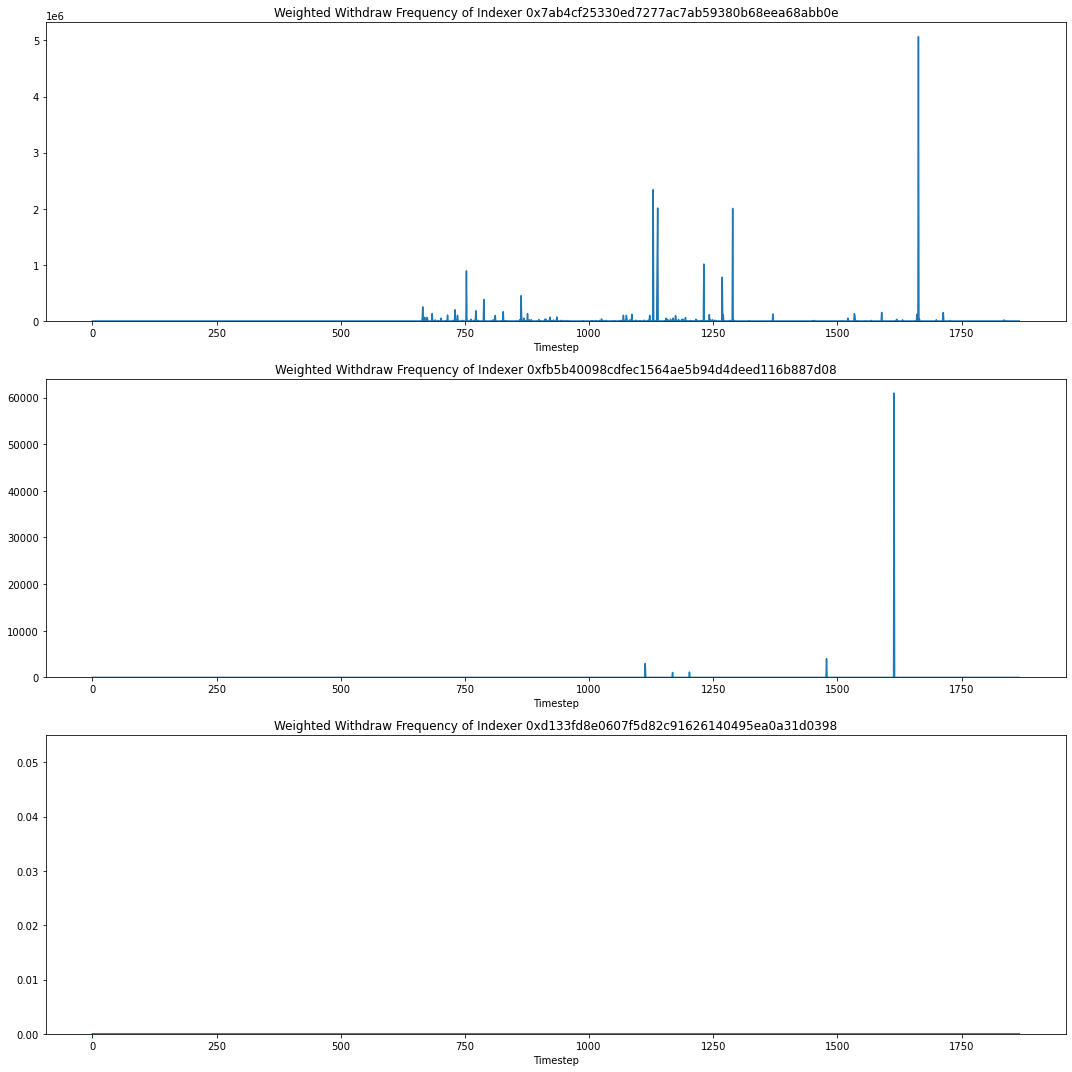

In [16]:
fig, axs = plt.subplots(len(delegator_shares), figsize = (15,15))
for i, j in enumerate(indexer_values_df.columns):
    axs[i].plot(withdraw_hist_df.timestep, withdraw_hist_df.loc[:, f'{j}_withdraw_weighted'])
    axs[i].set_title(f'Weighted Withdraw Frequency of Indexer {j}')
    axs[i].set_xlabel('Timestep')
    axs[i].set_ylim(0)
fig.tight_layout()

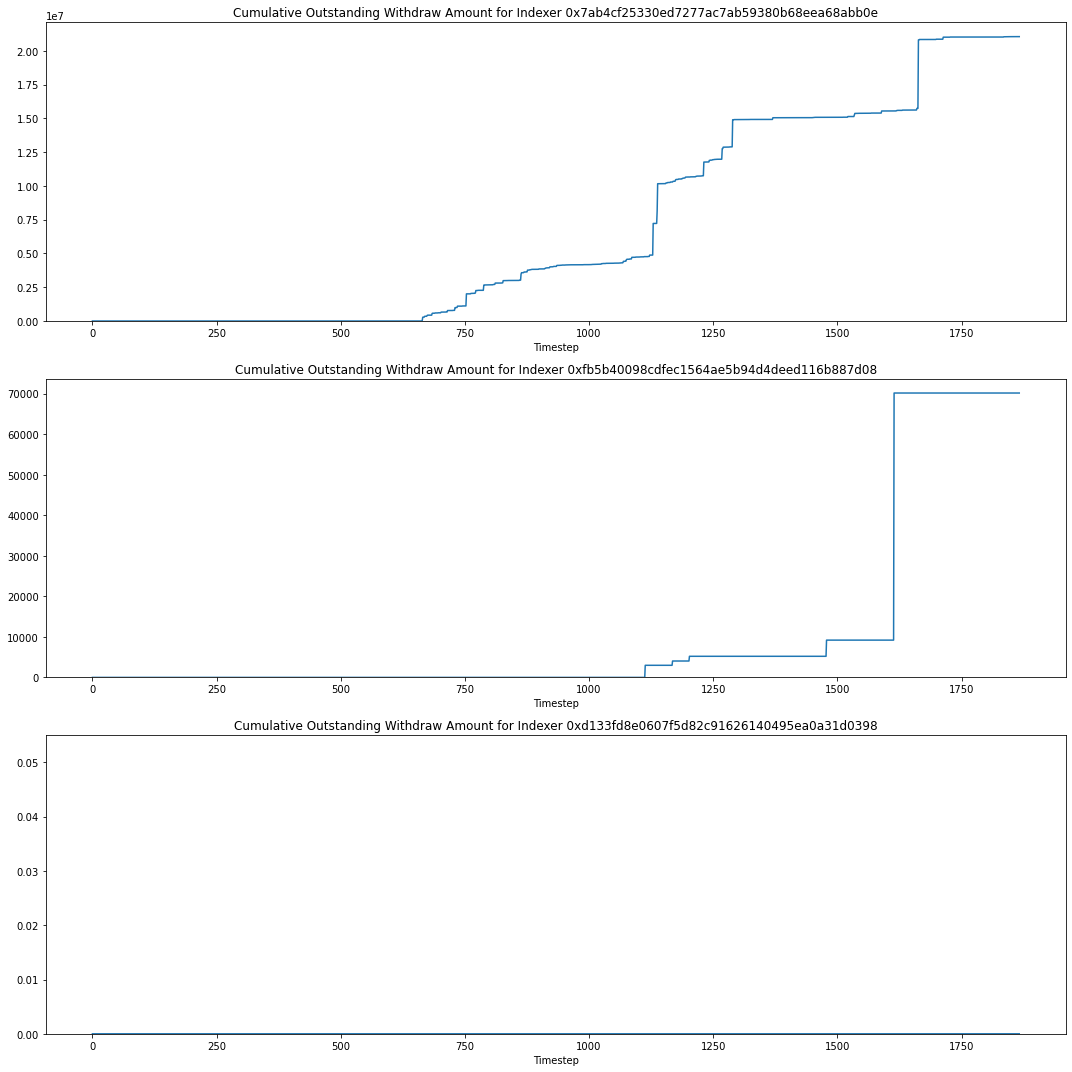

In [17]:
fig, axs = plt.subplots(len(delegator_shares), figsize = (15,15))
for i, j in enumerate(indexer_values_df.columns):
    axs[i].plot(withdraw_hist_df.timestep, withdraw_hist_df.loc[:, f'{j}_withdraw_weighted'].cumsum())
    axs[i].set_title(f'Cumulative Outstanding Withdraw Amount for Indexer {j}')
    axs[i].set_xlabel('Timestep')
    axs[i].set_ylim(0)
fig.tight_layout()

In [18]:
delegation_events_dict = delegation_events

In [19]:
delegation_events_df = pd.DataFrame(delegation_events_dict).T

In [20]:
delegation_events_df = pd.DataFrame(list(delegation_events_df[0]))

In [21]:
delegation_events_df.head()

,timestep,allocationID,blockNumber,epoch,id,indexer,logIndex,subgraphDeploymentID,tokens,type,...,from,rebateFees,delegator,shares,eventTime,until,indexingRewardCut,queryFeeCut,delegationFees,amount
0,3,NaN,11474307,NaN,0x938641c2dbfd4562c7ab8c60ca98f11394d161ead6b9...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,17,NaN,165851.137200000000000000,stakeDelegateds,...,NaN,NaN,0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea,165851.137200000000000000,NaN,NaN,NaN,NaN,NaN,0
1,4,NaN,11474332,NaN,0x67278b0af539dff48945b3a430ada90de00526aed433...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,38,NaN,251819.644650000000000000,stakeDelegateds,...,NaN,NaN,0xd776a7306ee6a060cebb46b46d305e88fd39ba84,251819.644650000000000000,NaN,NaN,NaN,NaN,NaN,0
2,7,NaN,11474496,NaN,0x1959bd2f0db2f95a3608e12c87c16122d2a822a1ddd3...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,84,NaN,6965.000000000000000000,stakeDelegateds,...,NaN,NaN,0x53c0fa070e310ce1690b3c83b2ab7f20d74d4922,6965.000000000000000000,NaN,NaN,NaN,NaN,NaN,0
3,8,NaN,11474499,NaN,0x9e1054a42c5a3159474cccc230a2d3838d5351656577...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,190,NaN,9950.000000000000000000,stakeDelegateds,...,NaN,NaN,0x9327775e225a703125167eb423d246915bdc37e7,9950.000000000000000000,NaN,NaN,NaN,NaN,NaN,0
4,9,NaN,11474504,NaN,0x1d7bf818ed90521f8c3617ba98a631a05d60f5f95d80...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,181,NaN,1991.758662500000000000,stakeDelegateds,...,NaN,NaN,0x32345932bc863f54ef87e2ece3d458f1789b1bfc,1991.758662500000000000,NaN,NaN,NaN,NaN,NaN,0


In [22]:
delegation_hist_df = indexer_values_df.merge(delegation_events_df, how = 'outer', left_on = indexer_values_df.index, right_on = 'timestep')
delegation_hist_df.head()

,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,0xfb5b40098cdfec1564ae5b94d4deed116b887d08,0xd133fd8e0607f5d82c91626140495ea0a31d0398,timestep,allocationID,blockNumber,epoch,id,indexer,logIndex,...,from,rebateFees,delegator,shares,eventTime,until,indexingRewardCut,queryFeeCut,delegationFees,amount
0,{},{},{},0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{},{},{},1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},3,NaN,11474307.0,NaN,0x938641c2dbfd4562c7ab8c60ca98f11394d161ead6b9...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,17.0,...,NaN,NaN,0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea,165851.137200000000000000,NaN,NaN,NaN,NaN,NaN,0
4,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},4,NaN,11474332.0,NaN,0x67278b0af539dff48945b3a430ada90de00526aed433...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,38.0,...,NaN,NaN,0xd776a7306ee6a060cebb46b46d305e88fd39ba84,251819.644650000000000000,NaN,NaN,NaN,NaN,NaN,0


In [23]:
for i in indexer_values_df.columns:
    delegation_hist_df[f'{i}_delegated_tokens'] = [j['tokens'] if j['indexer'] == i  else 0 for k, j in delegation_hist_df.iterrows()]
delegation_hist_df

,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,0xfb5b40098cdfec1564ae5b94d4deed116b887d08,0xd133fd8e0607f5d82c91626140495ea0a31d0398,timestep,allocationID,blockNumber,epoch,id,indexer,logIndex,...,shares,eventTime,until,indexingRewardCut,queryFeeCut,delegationFees,amount,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e_delegated_tokens,0xfb5b40098cdfec1564ae5b94d4deed116b887d08_delegated_tokens,0xd133fd8e0607f5d82c91626140495ea0a31d0398_delegated_tokens
0,{},{},{},0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,{},{},{},1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},3,NaN,11474307.0,NaN,0x938641c2dbfd4562c7ab8c60ca98f11394d161ead6b9...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,17.0,...,165851.137200000000000000,NaN,NaN,NaN,NaN,NaN,0,165851.137200000000000000,0,0
4,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},4,NaN,11474332.0,NaN,0x67278b0af539dff48945b3a430ada90de00526aed433...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,38.0,...,251819.644650000000000000,NaN,NaN,NaN,NaN,NaN,0,251819.644650000000000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...,{'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...,1863,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1864,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...,{'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...,1864,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1865,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...,{'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...,1865,NaN,13202983.0,NaN,0x4945b9f1daf1f6151fb23e50954bb14eb2cc6ffb8f58...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,36.0,...,1334.699008310774357567,NaN,NaN,NaN,NaN,NaN,0,1384.783029180650000000,0,0
1866,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...,{'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...,1866,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


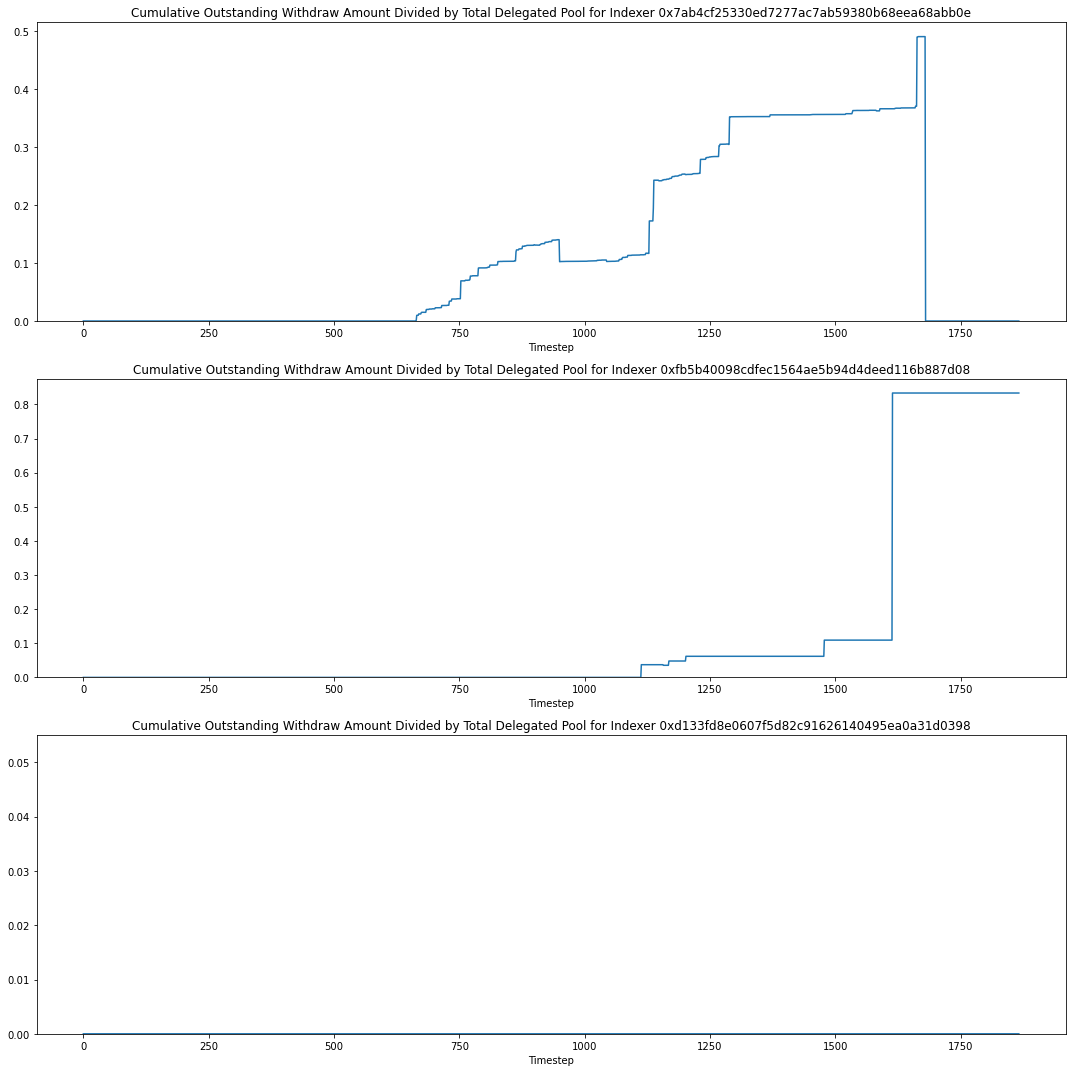

In [24]:
fig, axs = plt.subplots(len(delegator_shares), figsize = (15,15))
for i, j in enumerate(indexer_values_df.columns):
    axs[i].plot(delegation_hist_df.timestep, withdraw_hist_df.loc[:, f'{j}_withdraw_weighted'].cumsum().astype(float)/(delegation_hist_df.loc[:, f'{j}_delegated_tokens'].cumsum().astype(float) + 1))
    axs[i].set_title(f'Cumulative Outstanding Withdraw Amount Divided by Total Delegated Pool for Indexer {j}')
    axs[i].set_xlabel('Timestep')
    axs[i].set_ylim(0)
fig.tight_layout()

# Token Share Price

In [25]:
for i in indexer_values_df.columns:
    delegation_hist_df[f'{i}_delegated_shares'] = [j['shares'] if j['indexer'] == i  else 0 for k, j in delegation_hist_df.iterrows()]
delegation_hist_df.head()

,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,0xfb5b40098cdfec1564ae5b94d4deed116b887d08,0xd133fd8e0607f5d82c91626140495ea0a31d0398,timestep,allocationID,blockNumber,epoch,id,indexer,logIndex,...,indexingRewardCut,queryFeeCut,delegationFees,amount,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e_delegated_tokens,0xfb5b40098cdfec1564ae5b94d4deed116b887d08_delegated_tokens,0xd133fd8e0607f5d82c91626140495ea0a31d0398_delegated_tokens,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e_delegated_shares,0xfb5b40098cdfec1564ae5b94d4deed116b887d08_delegated_shares,0xd133fd8e0607f5d82c91626140495ea0a31d0398_delegated_shares
0,{},{},{},0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,{},{},{},1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},3,NaN,11474307.0,NaN,0x938641c2dbfd4562c7ab8c60ca98f11394d161ead6b9...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,17.0,...,NaN,NaN,NaN,0,165851.137200000000000000,0,0,165851.137200000000000000,0,0
4,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,{},{},4,NaN,11474332.0,NaN,0x67278b0af539dff48945b3a430ada90de00526aed433...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,38.0,...,NaN,NaN,NaN,0,251819.644650000000000000,0,0,251819.644650000000000000,0,0


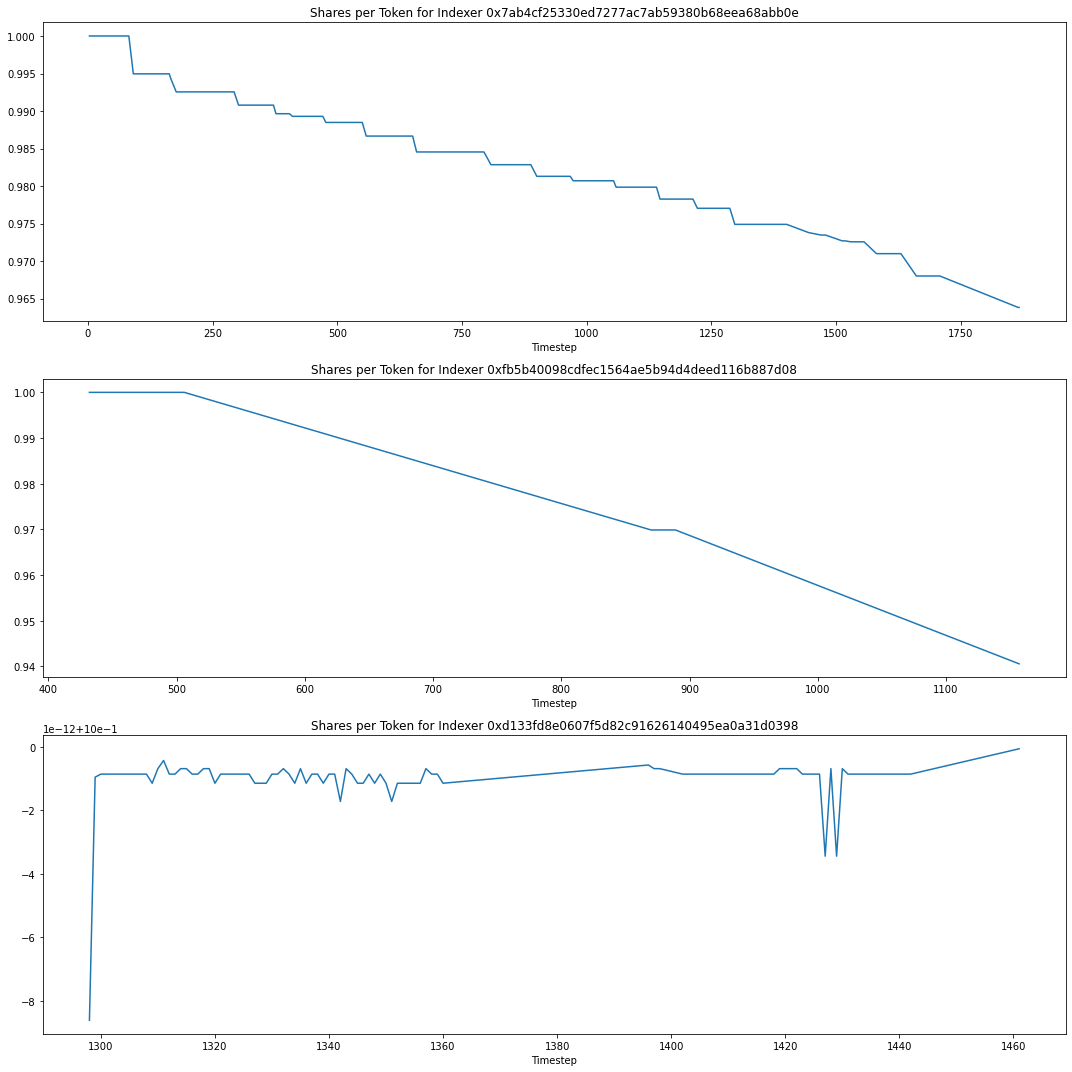

In [26]:
fig, axs = plt.subplots(len(delegator_shares), figsize = (15,15))
#delegation_event_only_df = delegation_hist_df[(delegation_hist_df['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e_delegated_tokens'] != 0) | (delegation_hist_df['0xfb5b40098cdfec1564ae5b94d4deed116b887d08_delegated_tokens'] != 0) | (delegation_hist_df['0xd133fd8e0607f5d82c91626140495ea0a31d0398_delegated_tokens'] != 0)]
#delegation_event_only_df = delegation_event_only_df.reset_index()
for i, j in enumerate(indexer_values_df.columns):
    delegation_plot_df = delegation_hist_df[delegation_hist_df['indexer'] == j]
    #delegation_plot_df = delegation_plot_df.reset_index()
    axs[i].plot(delegation_plot_df.index, delegation_plot_df.loc[:, f'{j}_delegated_shares'].astype(float)/(delegation_plot_df.loc[:, f'{j}_delegated_tokens'].astype(float) + 0.0000001))
    axs[i].set_title(f'Shares per Token for Indexer {j}')
    axs[i].set_xlabel('Timestep')
    #axs[i].set_xlim(0)
fig.tight_layout()

# Unrealized Earnings

In [ ]:
fig = make_subplots(rows=3, cols=1, subplot_titles = [f'Unrealized Earnings of Delegators for Indexer {i}'  for i in indexer_values_df.columns])

for i,k in enumerate(indexer_values_df.columns):
    delegator_df = pd.DataFrame(delegator_shares[i])
    delegation_plot_df = delegation_hist_df[delegation_hist_df['indexer'] == k]
    #delegator_df = delegator_df.reset_index()
    for j in delegator_df.columns:
        fig.append_trace(
            go.Scatter(x = delegator_df.index, 
                       y = delegator_df[j] / (delegation_plot_df.loc[:, f'{k}_delegated_shares'].astype(float)/(delegation_plot_df.loc[:, f'{k}_delegated_tokens'].astype(float) + 0.0000001)), 
                       fill='tozeroy',  stackgroup = 'one', name = j),
            row=i + 1, col=1
        )
fig.show()

# Net Earnings

In [ ]:
fig = make_subplots(rows=3, cols=1, subplot_titles = [f'Net Earnings of Delegators for Indexer {i}'  for i in indexer_values_df.columns])

for i,k in enumerate(indexer_values_df.columns):
    delegator_df = pd.DataFrame(delegator_shares[i])
    delegation_plot_df = delegation_hist_df[delegation_hist_df['indexer'] == k]
    #delegator_df = delegator_df.reset_index()
    for j in delegator_df.columns:
        fig.append_trace(
            go.Scatter(x = delegator_df.index, 
                       y =  delegation_plot_df.loc[:, f'{k}_delegated_tokens'].astype(float) - 
                       (delegator_df[j] / (delegation_plot_df.loc[:, f'{k}_delegated_shares'].astype(float)/(delegation_plot_df.loc[:, f'{k}_delegated_tokens'].astype(float) + 0.0000001))), 
                       fill='tozeroy',  stackgroup = 'one', name = j),
            row=i + 1, col=1
        )
fig.show()

# Delegators across Indexers

In [28]:
delegator_list = []
for i in range(len(delegator_shares)):
    delegator_list.append(list(delegator_shares[i].keys()))
seen = set()
repeated = set()
for l in delegator_list:
  for i in set(l):
    if i in seen:
      repeated.add(i)
    else:
      seen.add(i)
repeated

set()